In [1]:
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load training X data
data = np.loadtxt('train_FD001.txt', skiprows=0, unpack=False)
X = pd.DataFrame(data, columns=['Unit#','time','op1','op2','op3','s1','s2','s3','s4','s5',
                                      's6','s7','s8','s9','s10','s11','s12','s13','s14','s15',
                                      's16','s17','s18','s19','s20','s21'])

# Extract training Y data from X dataset (Since the engines have been run to failure
# we flip the time list for each engine)
Y = pd.DataFrame()
time = np.array([])
for i in range(100):
    engine = (X.loc[X['Unit#'] == i+1])
    time = np.append(time, np.flip(np.array(engine['time'])))
Y = pd.DataFrame(time, columns=['time'])
Y = np.array(Y)[:,0]

In [3]:
# Load test data X
X_test_data = np.loadtxt('test_FD001.txt', skiprows=0, unpack=False)
X_test_data_pd = pd.DataFrame(X_test_data, 
                     columns=['Unit#','time','op1','op2','op3','s1','s2','s3','s4',
                              's5','s6','s7','s8','s9','s10','s11','s12','s13','s14',
                              's15','s16','s17','s18','s19','s20','s21'])
#X_test = X_test.drop(X_test.columns[len(X_test.columns)-1], axis=1, inplace=True)

Y_test_data = np.loadtxt('RUL_FD001.txt', skiprows=0, unpack=False)
Y_test = pd.DataFrame(Y_test_data, columns=['RUL'])
Y_test = np.array(Y_test)[:,0]

In [4]:
# Retrive the last element in each engine in test data
X_test_lst = np.zeros((100, X.shape[1]))
for i in range (int(X_test_data_pd['Unit#'].max())):
    engine = X.loc[X['Unit#'] == i+1]
    #print(engine.tail(1))
    X_test_lst[i] = engine.tail(1)

# The shape of X_test is (100, #features)
X_test = pd.DataFrame(X_test_lst, 
                 columns=['Unit#','time','op1','op2','op3','s1','s2','s3','s4',
                          's5','s6','s7','s8','s9','s10','s11','s12','s13','s14',
                          's15','s16','s17','s18','s19','s20','s21'])

In [5]:
# Remove columns with constant values to remove noise
removedColNames = []
for (colName, colData) in X.iteritems():
    maxVal = X[colName].max()
    minVal = X[colName].min()
    #print('Column Name : ', colName, '  Max Value: {}  '.format(maxVal), 'Min Value: {}'.format(minVal))
    if (minVal == maxVal):
        X = X.drop(columns=[colName])
        removedColNames.append(colName)

# Remove the same columns from the test dataset

X_test_data_pd = X_test_data_pd.drop(columns=removedColNames)
X_test = X_test.drop(columns=removedColNames)

#Remove time column
'''
X = X.drop(columns=['time'])
X_test_data_pd = X_test_data_pd.drop(columns=['time'])
X_test = X_test.drop(columns=['time'])
'''
feature_names = np.array(X.columns)


In [6]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))

# Add X and X_test in one np.array
data = X.append(X_test)

#X_normalized = scaler.fit_transform(X)
data
#pd.DataFrame(data, columns=feature_names)


,Unit#,time,op1,op2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,1.0,1.0,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190
1,1.0,2.0,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392.0,39.00,23.4236
2,1.0,3.0,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442
3,1.0,4.0,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739
4,1.0,5.0,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393.0,38.90,23.4044
5,1.0,6.0,-0.0043,-0.0001,642.10,1584.47,1398.37,21.61,554.67,2388.02,9049.68,47.16,521.68,2388.03,8132.85,8.4108,391.0,38.98,23.3669
6,1.0,7.0,0.0010,0.0001,642.48,1592.32,1397.77,21.61,554.34,2388.02,9059.13,47.36,522.32,2388.03,8132.32,8.3974,392.0,39.10,23.3774
7,1.0,8.0,-0.0034,0.0003,642.56,1582.96,1400.97,21.61,553.85,2388.00,9040.80,47.24,522.47,2388.03,8131.07,8.4076,391.0,38.97,23.3106
8,1.0,9.0,0.0008,0.0001,642.12,1590.98,1394.80,21.61,553.69,2388.05,9046.46,47.29,521.79,2388.05,8125.69,8.3728,392.0,39.05,23.4066
9,1.0,10.0,-0.0033,0.0001,641.71,1591.24,1400.46,21.61,553.59,2388.05,9051.70,47.03,521.79,2388.06,8129.38,8.4286,393.0,38.95,23.4694


In [7]:
#Using Random Forest:
clf_rf = RandomForestRegressor(n_estimators=100, max_depth=6
                               , random_state=0)
rf = clf_rf.fit(X, Y)
pred_train_rf = clf_rf.predict(X)
pred_test_rf = clf_rf.predict(X_test)
acc_train_rf = clf_rf.score(X, Y)
acc_test_rf = clf_rf.score(X_test, Y_test)

print('=================================\n       - RANDOM FOREST -')

print('\nRandom Forest Accuracy:\nTraining set:\t' + str(acc_train_rf))
print('Test set:\t{0:f}'.format(acc_test_rf))
print('=================================')

       - RANDOM FOREST -

Random Forest Accuracy:
Training set:	0.7976030435294681
Test set:	-2.619851


In [8]:
#pd.DataFrame(np.c_[pred_train_rf, Y])

In [9]:
# Using Linear Regression
reg = LinearRegression().fit(X, Y)
acc_train_reg = reg.score(X, Y)
acc_test_reg = reg.score(X_test, Y_test)
print('=================================\n       - LINEAR REGRESSION -')

print('\nLinear Regression Accuracy:\nTraining set:\t' + str(acc_train_reg))
print('Test set:\t{0:f}'.format(acc_test_reg))
print('=================================')

       - LINEAR REGRESSION -

Linear Regression Accuracy:
Training set:	0.6698572018608684
Test set:	-5.453100


In [10]:
# Must insert numpy instead of pandas in LIME
X_np = np.array(X)
X_test_np = np.array(X_test)

feature_names = np.array(X.columns)
categorical_features = np.argwhere(np.array([len(set(X_np[:,x])) for x in range(X_np.shape[1])]) <= 20).flatten()

# Use LIME
explainer = lime.lime_tabular.LimeTabularExplainer(X_np, feature_names=feature_names, class_names=['operations'], categorical_features=categorical_features, verbose=True, mode='regression')


In [11]:
i = 5
exp = explainer.explain_instance(X_test_np[i], rf.predict, num_features=10)

Intercept 137.82249730929084
Prediction_local [44.65583628]
Right: 7.044657948087596


In [12]:
exp.show_in_notebook(show_table=True)

In [13]:
# Plot of what the data sets test_x and test_y actually look like

def plot_data(x_data, y_data, engine_number, feature):
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    ax.plot(x_data, y_data, color='b', marker='.')
    plt.title('Data from engine: {0}. \nFeature: {1}'.format(engine_number, feature), fontsize=20)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel('Feature {}'.format(feature), fontsize=16)
    plt.grid(True)
#    ax.set_ylim(np.amin(y_data), np.amax(y_data))
    print(np.amax(y_data))
    print(np.amin(y_data))
    plt.show()

100.0
100.0


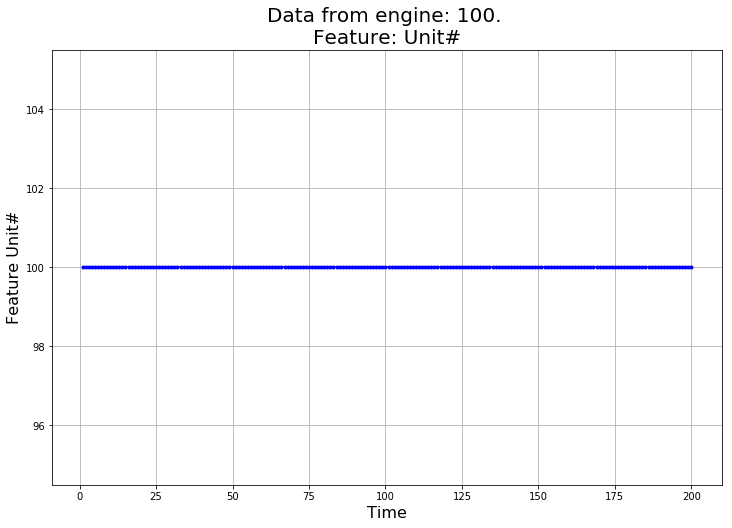

200.0
1.0


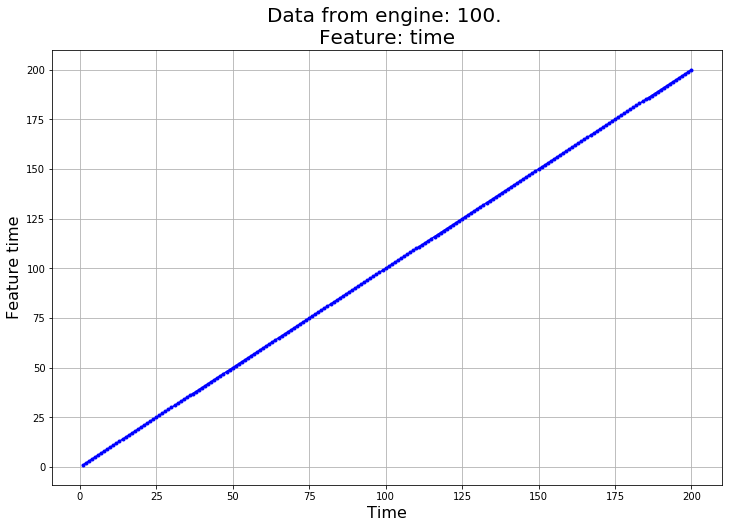

0.0056
-0.0052


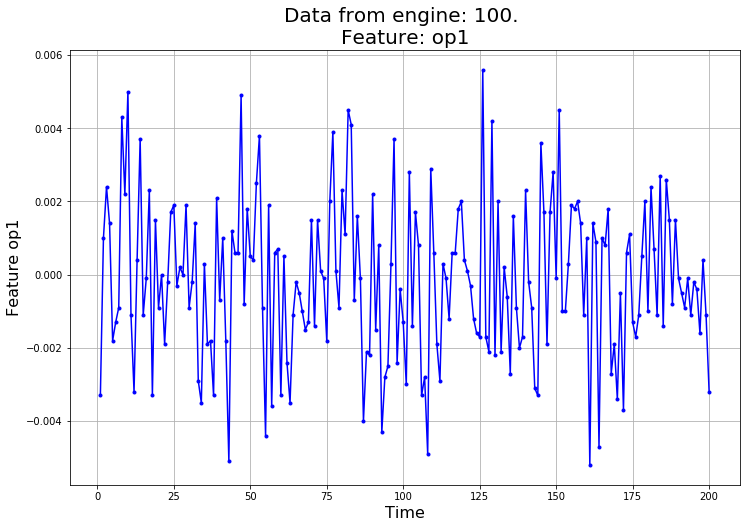

0.0004
-0.0006


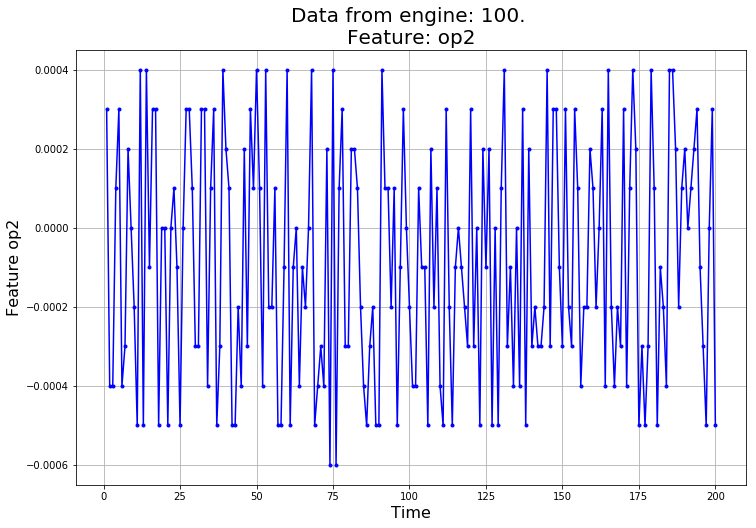

643.95
641.65


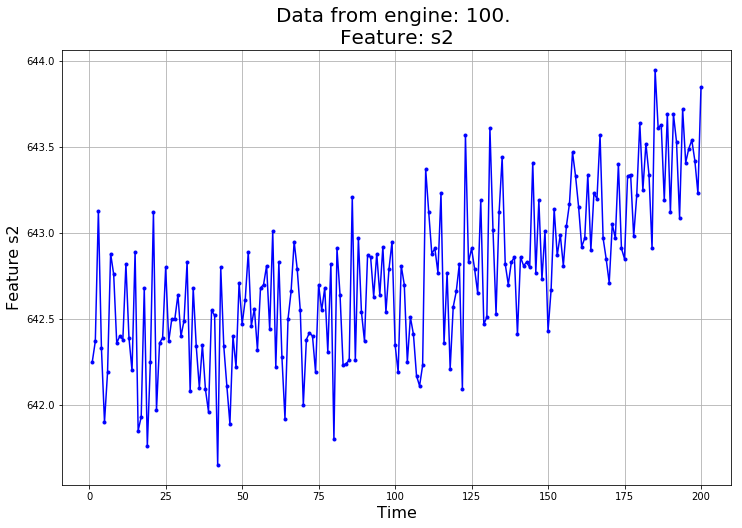

1610.87
1579.42


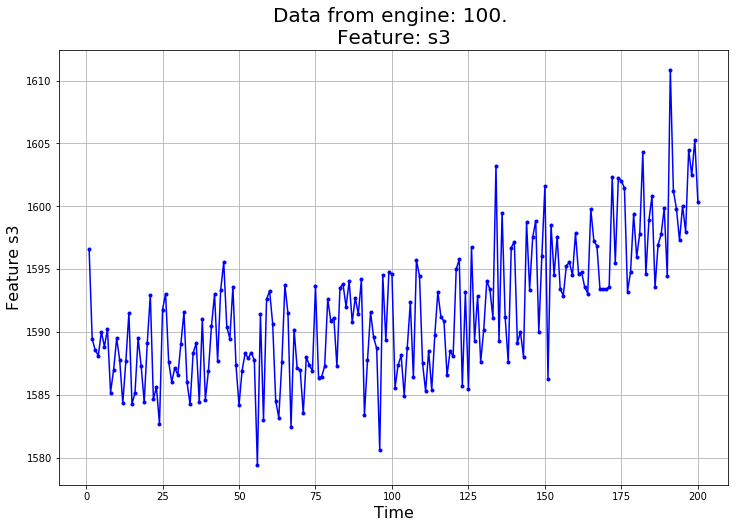

1433.58
1396.0


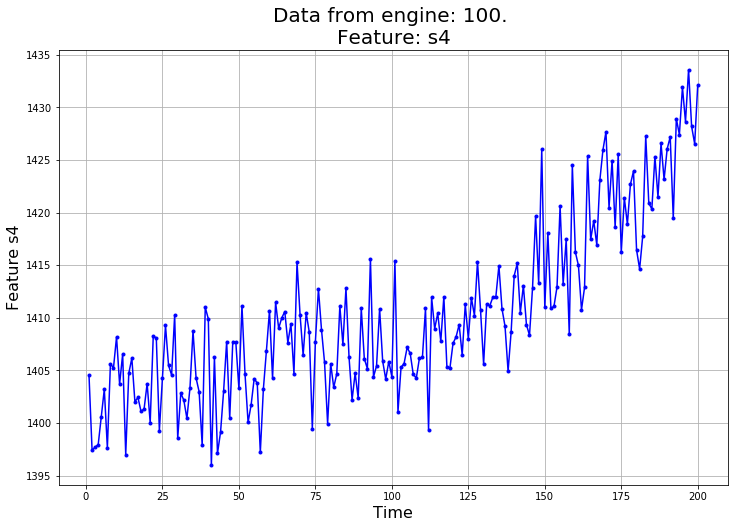

21.61
21.6


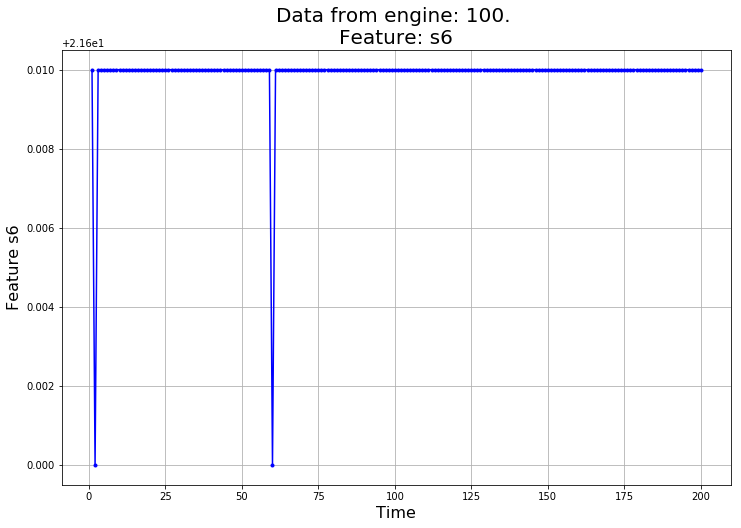

554.69
550.68


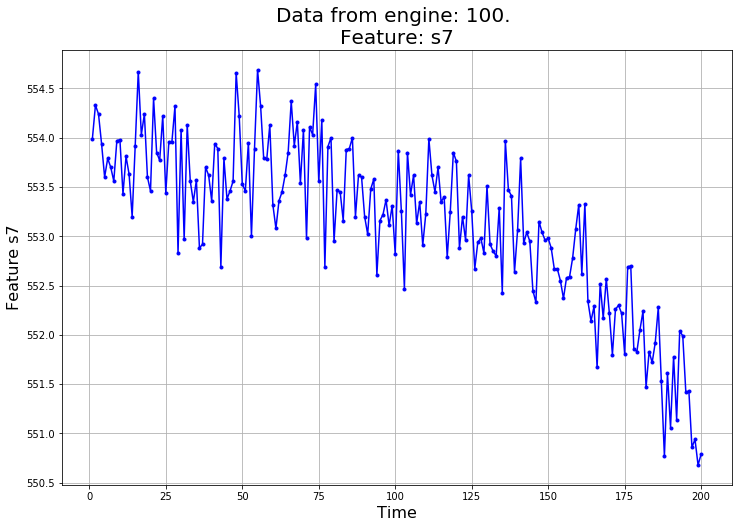

2388.29
2388.0


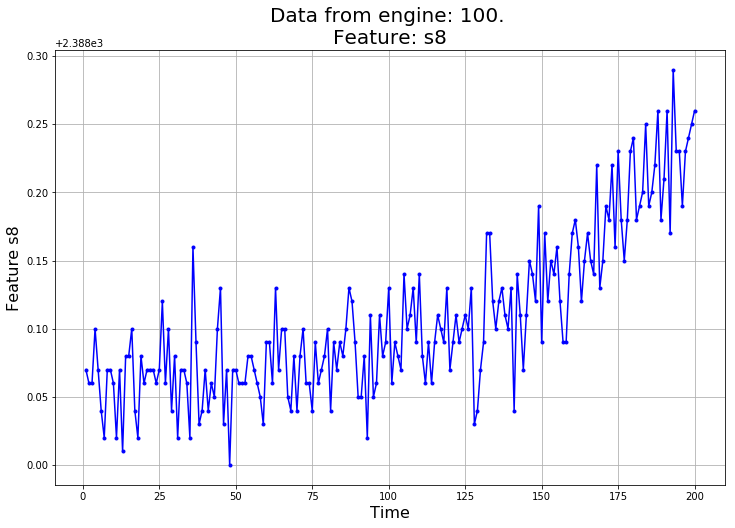

9076.28
9046.8


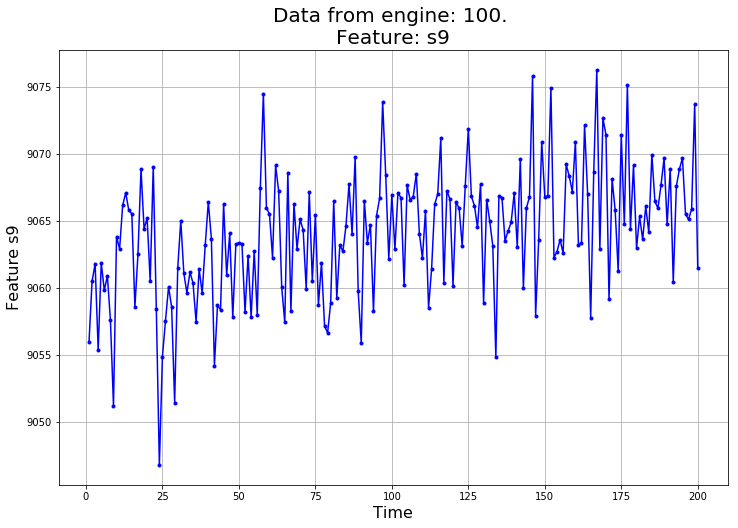

48.39
47.12


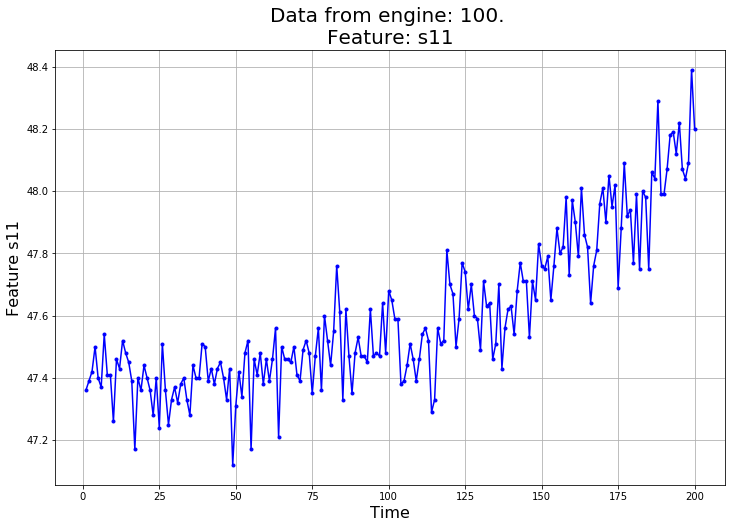

522.3
519.3


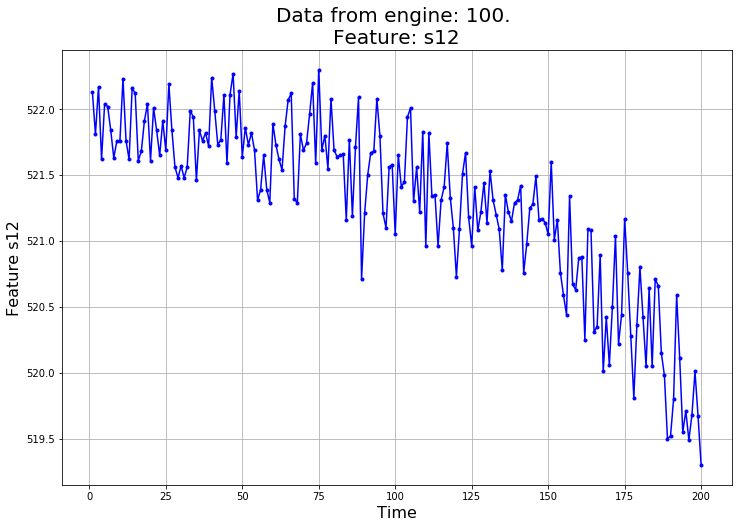

2388.28
2387.97


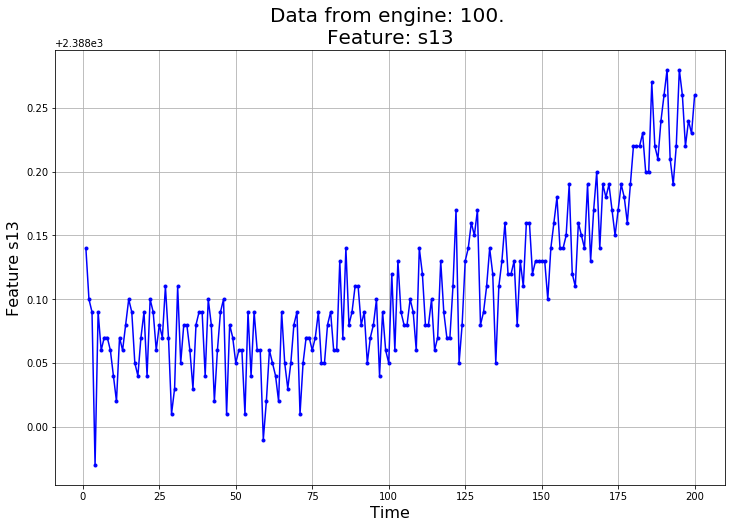

8150.68
8134.58


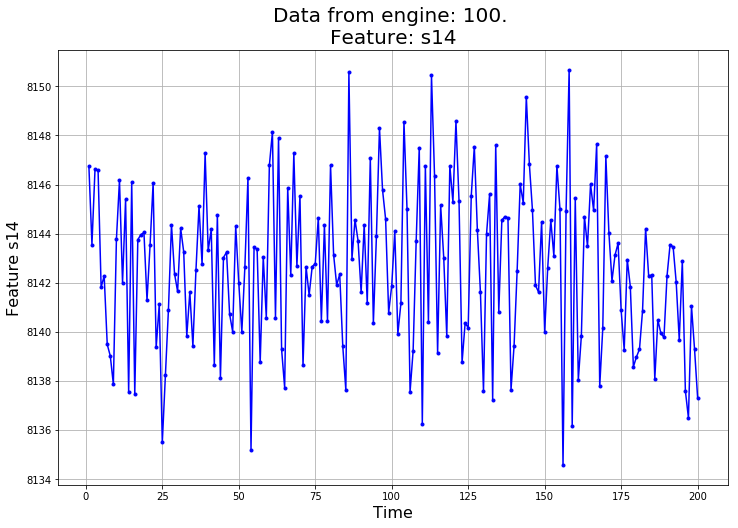

8.5646
8.365


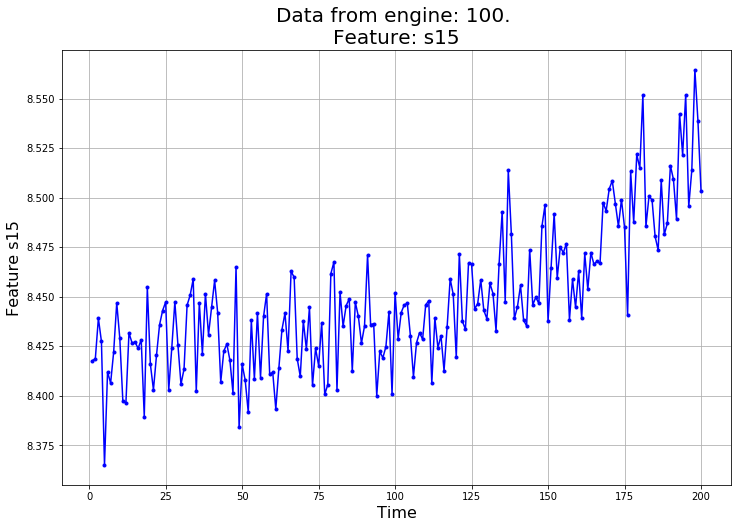

398.0
390.0


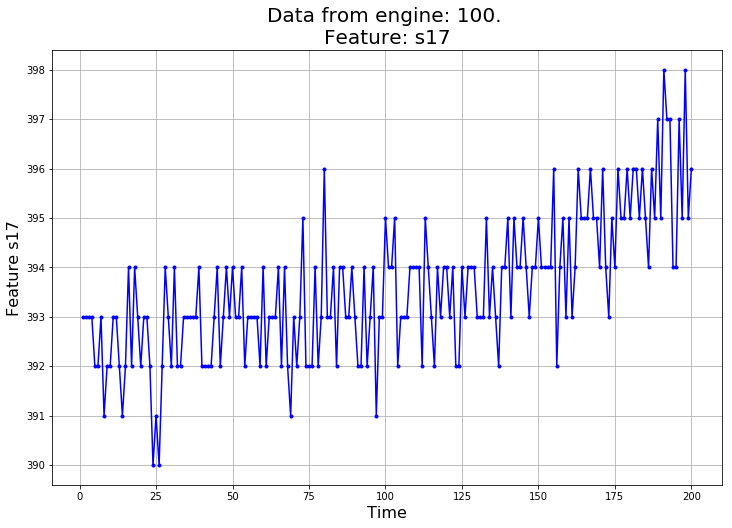

39.18
38.14


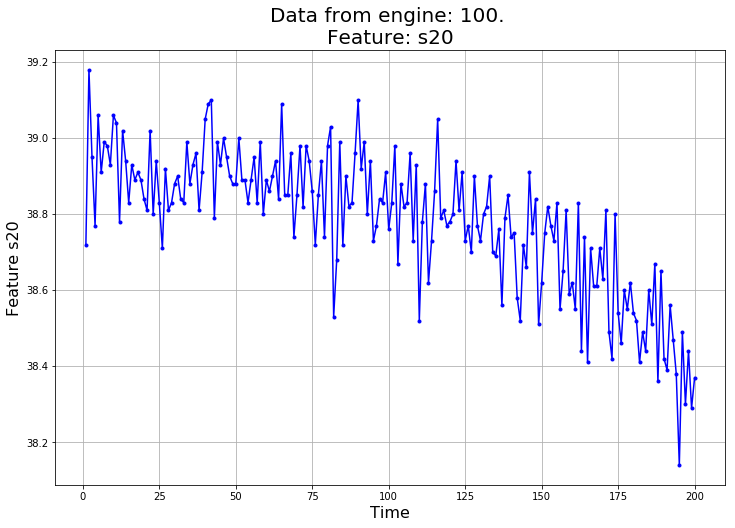

23.5751
22.9333


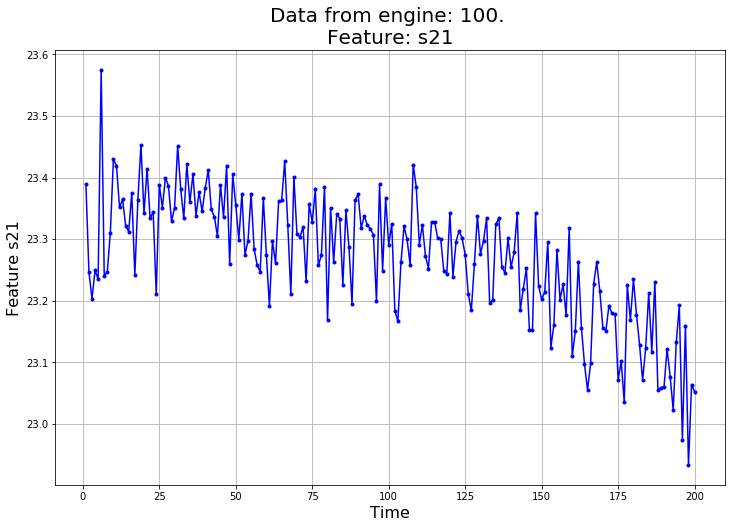

In [14]:
# Print the features vs time for a given engine.
for (colName, colData) in X.iteritems():
    engine_number = 100
    engine = X.loc[X['Unit#'] == engine_number]
    feature = 's{}'.format(i+1)
    plot_data(engine['time'], engine[colName], engine_number, colName)